<a href="https://colab.research.google.com/github/William-Wagner-dev/Aulas-ADS/blob/Trabalhos/Trabalho_U3_A4_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiramente, para esse trabalho, estarei seguindo o "Passo 1" proposto pelo porprofessorfessor Anderson.

O mesmo nos entrega um norte mediante a conexão, cursor e dados iniciais para
o projeto.

In [1]:
#Passo 1: Conectar ao banco de dados SQLite e criar uma tabela
#Primeiro, você precisa estabelecer uma conexão com o banco de dados SQLite e carregar
#os dados relevantes para análise.

import sqlite3

# Passo 1.1: Conectar ao banco de dados (ou criar, se não existir)
conexao = sqlite3.connect('dados_vendas.db')

In [2]:
# Passo 1.2: Criar um cursor
cursor = conexao.cursor()

# Passo 1.3: Criar uma tabela (se não existir)
cursor.execute('''
CREATE TABLE vendas1 (
id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
data_venda DATE,
produto TEXT,
categoria TEXT,
valor_venda REAL
)
''')

In [3]:
# Passo 1.4: Inserir alguns dados
cursor.execute('''
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 350.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00);
''')

In [4]:
# Passo 1.5: Confirmar as mudanças
conexao.commit()


Passo 2:

Explorar e preparar os dados


• Agora que os dados estão carregados em um
DataFrame do Pandas (df_vendas), podemos explorá-los
e prepará-los para análise.

In [9]:
# Passo 2: Explorar e preparar os dados
# Importando a biblioteca pandas para carregar e manipular o DataFrame
import pandas as pd
import sqlite3

# Conectando ao banco de dados criado no Passo 1
conexao = sqlite3.connect('dados_vendas.db')

# Carregando os dados da tabela 'vendas1' para um DataFrame do Pandas
# pd.read_sql_query() executa uma consulta SQL e retorna os dados em um DataFrame.
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

# Exibindo as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print("Visualizando as primeiras 5 linhas do DataFrame:")
print(df_vendas.head())

Visualizando as primeiras 5 linhas do DataFrame:
   id_venda  data_venda    produto    categoria  valor_venda
0         1  2023-01-01  Produto A  Eletrônicos       1500.0
1         2  2023-01-05  Produto B       Roupas        350.0
2         3  2023-02-10  Produto C  Eletrônicos       1200.0
3         4  2023-03-15  Produto D       Livros        200.0
4         5  2023-03-20  Produto E  Eletrônicos        800.0


Depois de configurar o banco de dados SQLite, o próximo passo é carregar os dados para análise. Para isso, vamos utilizar a biblioteca pandas, que é uma ótima biblioteca para manipulação e análise de dados.

Agora que temos os dados, podemos ter uma noção melhor dos dados apresentados, o que nos possibilita uma análise mais acertiva no problema de melhorar o desempenho.


Passo 3: Análise dos dados
• Realize análises específicas para extrair insights sobre as vendas.

In [11]:
# Passo 3: Análise dos dados
# 1. Calculando o total de vendas por categoria
# Usamos .groupby('categoria') para agrupar e .sum() para somar os valores de venda.
vendas_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().sort_values(ascending=False)
print("\nTotal de vendas por categoria:")
print(vendas_por_categoria)

# 2. Identificando o produto com o maior valor de venda
# Usamos .idxmax() para encontrar o índice do maior valor na coluna 'valor_venda'.
produto_mais_caro = df_vendas.loc[df_vendas['valor_venda'].idxmax()]
print("\nProduto com o maior valor de venda (maior valor unitário):")
print(produto_mais_caro)

# 3. Calculando a média de vendas
media_vendas = df_vendas['valor_venda'].mean()
print(f"\nValor médio das vendas: R$ {media_vendas:.2f}")

# 4. Encontrando o produto que mais teve vendas
# Usamos .value_counts() para contar a frequência de cada produto na coluna 'produto'.
contagem_produtos = df_vendas['produto'].value_counts()

# O primeiro item (índice 0) após a contagem e ordenação é o produto mais vendido.
produto_mais_saiu = contagem_produtos.index[0]
quantidade_saida = contagem_produtos.iloc[0]

print("\n--- Informações sobre Quantidade Vendida ---")
print(f"Produto que mais teve saída (em quantidade de transações): {produto_mais_saiu}")
print(f"Número de transações deste produto: {quantidade_saida}")


Total de vendas por categoria:
categoria
Eletrônicos    6100.0
Roupas         1800.0
Livros          900.0
Name: valor_venda, dtype: float64

Produto com o maior valor de venda (maior valor unitário):
id_venda                 1
data_venda      2023-01-01
produto          Produto A
categoria      Eletrônicos
valor_venda         1500.0
Name: 0, dtype: object

Valor médio das vendas: R$ 628.57

--- Informações sobre Quantidade Vendida ---
Produto que mais teve saída (em quantidade de transações): Produto A
Número de transações deste produto: 1


Nesta etapa, o objetivo é realizar análises específicas para extrair informações valiosas sobre as vendas. Usaremos as funcionalidades do pandas para calcular estatísticas e identificar tendências.

Com os dados extraidos, temos uma ideia mais clara que as principais vendas
está na seção de eletronicos, seguindo pelas roupas e termonando nos livros.
No qual, temos um ticket médio de venda de 628,57. Significa que, na grande maioria das vezes os clientes fazem no mínimo um pedido de 628,57.Assim como temos uma venda com valor máximo de 1500,00, o que aumenta o valor do ticket médio.

Passo 4: Visualização dos dados
• Utilize Matplotlib e Seaborn para criar visualizações que ajudem na interpretação dos
resultados.


In [21]:
# Passo 4: Visualização dos dados
# Importando as bibliotecas Matplotlib e Seaborn para gerar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos para melhor visualização
sns.set_style("whitegrid")

/tmp/ipython-input-575662730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')


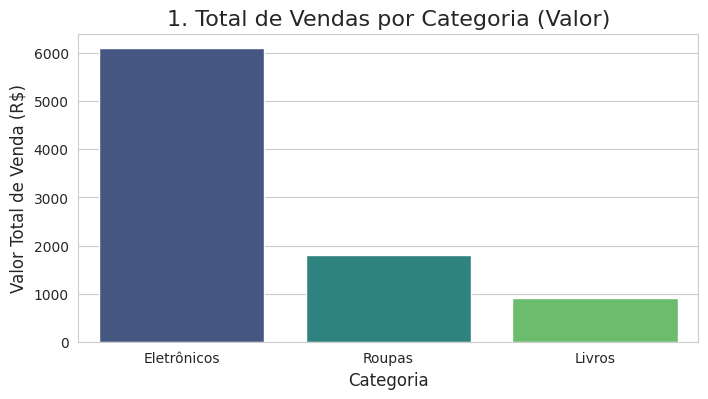

In [23]:
# --- GRÁFICO 1: TOTAL DE VENDAS POR CATEGORIA (VALOR) ---
# Gráfico de barras para visualizar as vendas por categoria
plt.figure(figsize=(8, 4))
# sns.barplot utiliza os dados de 'vendas_por_categoria' calculados no Passo 3
#grafico escolhido foi o de barras, por representar melhor as informações
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')
plt.title('1. Total de Vendas por Categoria (Valor)', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Valor Total de Venda (R$)', fontsize=12)
plt.show()

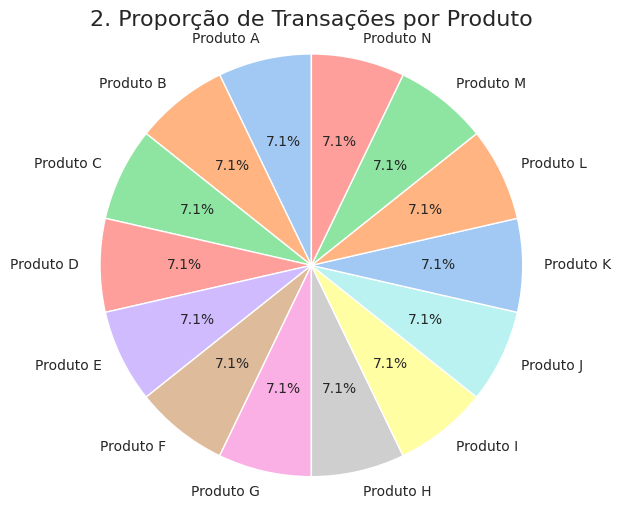

In [24]:
# --- GRÁFICO 2: QUANTIDADE DE VENDAS POR PRODUTO (GRÁFICO DE PIZZA) ---
# Criando um gráfico de pizza para visualizar a proporção de transações por produto
plt.figure(figsize=(6, 6))

# Os rótulos (labels) serão os nomes dos produtos (.index).
labels = contagem_produtos.index
# Os valores (sizes) serão a contagem de transações de cada produto (.values).
sizes = contagem_produtos.values

# O parâmetro 'autopct' formata a porcentagem que aparece em cada fatia.
# 'startangle=90' inicia a primeira fatia no topo.
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Garante que o gráfico seja um círculo (evita que fique oval).
plt.axis('equal')
plt.title('2. Proporção de Transações por Produto', fontsize=16)
plt.show()

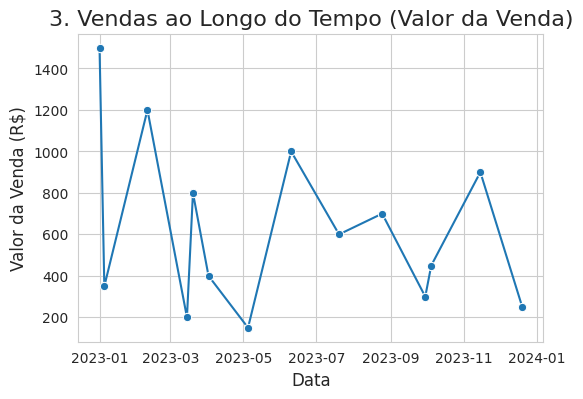

In [28]:
# --- GRÁFICO 3: VENDAS AO LONGO DO TEMPO ---
# Primeiro, convertemos a coluna 'data_venda' para o tipo datetime, se ainda não foi feito.
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
plt.figure(figsize=(6, 4))
# sns.lineplot() cria o gráfico de linha, mostrando a evolução do valor das vendas.
sns.lineplot(x='data_venda', y='valor_venda', data=df_vendas, marker='o', linestyle='-')
plt.title('3. Vendas ao Longo do Tempo (Valor da Venda)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor da Venda (R$)', fontsize=12)
plt.show()

Passo 5: Conclusão e análise de insights
• Finalize o exercício com uma breve análise dos insights obtidos e sugestões para a
empresa com base nos dados analisados.


Passo 5: Conclusão e Análise de Insights
A etapa final do trabalho consiste em resumir os resultados obtidos e propor sugestões com base nos dados analisados.

Análise dos Resultados:

O gráfico de barras mostra claramente que a categoria "Eletrônicos" é a que mais contribui para o faturamento total da empresa.

A categoria "Livros" tem o menor valor de vendas.

O gráfico de linha indica que não há um padrão sazonal forte nas vendas, mas o valor das transações individuais flutua consideravelmente ao longo do ano.

Sugestões para a Empresa:

Capitalizar o sucesso de "Eletrônicos": A empresa deve focar seus esforços de marketing e estoque na categoria de eletrônicos, que tem se mostrado a mais lucrativa.

Impulsionar as vendas de "Livros" e "Roupas": Sugere-se a criação de promoções ou campanhas de marketing direcionadas para aumentar o desempenho dessas categorias menos vendidas.